In [1]:
import os
import numpy as np
import pandas as pd
import tempfile

import pandapower as pp
import pandapower.networks as nw
from pandapower.timeseries import DFData
from pandapower.timeseries import OutputWriter
from pandapower.timeseries.run_time_series import run_timeseries
from pandapower.control import ConstControl

In [11]:
#creating our net
net = nw.create_cigre_network_mv()

In [12]:
#importing the active and reactive power of loads from excel
df_active = pd.read_csv('active_power_time_series.csv')
df_reactive = pd.read_csv('reactive_power_time_series.csv')
# create the data source from
ds_active = DFData(df_active)
ds_reactive = DFData(df_reactive)

In [13]:
df_active

,Load R1,Load R3,Load R4,Load R5,Load R6,Load R8,Load R10,Load R11,Load R12,Load R14,Load CI1,Load CI3,Load CI7,Load CI9,Load CI10,Load CI12,Load CI13,Load CI14
0,4.241053,0.078194,0.122092,0.205773,0.155016,0.165991,0.134439,0.093284,4.241053,0.058988,1.370408,0.063712,0.021638,0.162285,0.019234,1.418776,0.009617,0.093765
1,4.082791,0.075276,0.117536,0.198095,0.149231,0.159796,0.129422,0.089803,4.082791,0.056787,1.319269,0.061334,0.020831,0.156229,0.018516,1.365832,0.009258,0.090266
2,3.919174,0.072259,0.112826,0.190156,0.143251,0.153392,0.124235,0.086204,3.919174,0.054511,1.266400,0.058876,0.019996,0.149968,0.017774,1.311096,0.008887,0.086648
3,3.918352,0.072244,0.112802,0.190116,0.143221,0.153360,0.124209,0.086186,3.918352,0.054500,1.266134,0.058864,0.019992,0.149937,0.017770,1.310821,0.008885,0.086630
4,3.813214,0.070306,0.109776,0.185015,0.139378,0.149245,0.120876,0.083873,3.813214,0.053038,1.232161,0.057285,0.019455,0.145914,0.017293,1.275649,0.008647,0.084306
5,3.895276,0.071819,0.112138,0.188996,0.142377,0.152457,0.123478,0.085678,3.895276,0.054179,1.258678,0.058517,0.019874,0.149054,0.017666,1.303102,0.008833,0.086120
6,4.092852,0.075461,0.117826,0.198583,0.149599,0.160190,0.129741,0.090024,4.092852,0.056927,1.322520,0.061486,0.020882,0.156614,0.018562,1.369197,0.009281,0.090488
7,4.635395,0.085465,0.133445,0.224907,0.169430,0.181425,0.146939,0.101958,4.635395,0.064473,1.497832,0.069636,0.023650,0.177375,0.021022,1.550696,0.010511,0.102483
8,6.507081,0.119973,0.187327,0.315720,0.237842,0.254681,0.206270,0.143126,6.507081,0.090506,2.102628,0.097754,0.033199,0.248995,0.029511,2.176839,0.014755,0.143864
9,8.141067,0.150100,0.234367,0.395000,0.297566,0.318633,0.258067,0.179067,8.141067,0.113233,2.630617,0.122301,0.041536,0.311520,0.036921,2.723462,0.018460,0.179990


In [14]:
df_reactive

,Load R1,Load R3,Load R4,Load R5,Load R6,Load R8,Load R10,Load R11,Load R12,Load R14,Load CI1,Load CI3,Load CI7,Load CI9,Load CI10,Load CI12,Load CI13,Load CI14
0,0.861183,0.019597,0.030599,0.051572,0.038851,0.041601,0.033693,0.023379,0.861183,0.014784,0.450431,0.039485,0.013410,0.100575,0.011920,0.466329,0.005960,0.058110
1,0.829046,0.018866,0.029457,0.049647,0.037401,0.040049,0.032436,0.022507,0.829046,0.014232,0.433623,0.038012,0.012910,0.096822,0.011475,0.448927,0.005738,0.055942
2,0.795822,0.018110,0.028277,0.047658,0.035902,0.038444,0.031136,0.021605,0.795822,0.013662,0.416245,0.036488,0.012392,0.092942,0.011015,0.430936,0.005508,0.053700
3,0.795655,0.018106,0.028271,0.047648,0.035894,0.038436,0.031130,0.021600,0.795655,0.013659,0.416158,0.036481,0.012390,0.092922,0.011013,0.430846,0.005506,0.053689
4,0.774306,0.017620,0.027512,0.046369,0.034931,0.037404,0.030294,0.021021,0.774306,0.013293,0.404992,0.035502,0.012057,0.090429,0.010718,0.419285,0.005359,0.052248
5,0.790970,0.017999,0.028104,0.047367,0.035683,0.038209,0.030946,0.021473,0.790970,0.013579,0.413707,0.036266,0.012317,0.092375,0.010948,0.428309,0.005474,0.053372
6,0.831089,0.018912,0.029530,0.049770,0.037493,0.040147,0.032516,0.022562,0.831089,0.014267,0.434691,0.038105,0.012941,0.097061,0.011504,0.450033,0.005752,0.056079
7,0.941257,0.021419,0.033444,0.056367,0.042463,0.045469,0.036826,0.025553,0.941257,0.016159,0.492313,0.043156,0.014657,0.109927,0.013029,0.509689,0.006514,0.063513
8,1.321319,0.030068,0.046949,0.079127,0.059609,0.063829,0.051696,0.035871,1.321319,0.022683,0.691100,0.060582,0.020575,0.154313,0.018289,0.715492,0.009144,0.089159
9,1.653114,0.037619,0.058738,0.098996,0.074577,0.079857,0.064677,0.044878,1.653114,0.028379,0.864642,0.075795,0.025741,0.193063,0.022882,0.895159,0.011441,0.111547


In [9]:
def timeseries_example(output_dir):
    
    #defing the time step
    n_timesteps = 24
    
    # 3. create controllers (to control P values of the load) ds_p is for active power and ds_q for reactive power
    create_controllers(net, ds_active, ds_reactive)

    # time steps to be calculated. Could also be a list with non-consecutive time steps
    time_steps = range(0, n_timesteps)

    # 4. the output writer with the desired results to be stored to files.
    ow = create_output_writer(net, time_steps, output_dir=output_dir)

    # 5. the main time series function
    run_timeseries(net, time_steps) 

In [15]:
load_index=net.load.index
load_name=net.load.name
def create_controllers(net,ds_active, ds_reactive):
    for i in range(len(load_index)):
        ConstControl(net, element='load', variable='p_mw', element_index=load_index[i],
                 data_source=ds_active, profile_name=load_name[i])
        ConstControl(net, element='load', variable='q_mvar', element_index=load_index[i],
                 data_source=ds_reactive, profile_name=load_name[i])

In [17]:
def create_output_writer(net, time_steps, output_dir):
    ow = OutputWriter(net, time_steps, output_path=output_dir, output_file_type=".xlsx", log_variables=list())
    # these variables are saved to the harddisk after / during the time series loop
    ow.log_variable('res_load', 'p_mw')
    ow.log_variable('res_bus', 'vm_pu')
    ow.log_variable('res_line', 'loading_percent')
    ow.log_variable('res_line', 'i_ka')
    return ow

In [18]:
output_dir = os.path.join(tempfile.gettempdir(), "time_series")
print("Results can be found in your local temp folder: {}".format(output_dir))
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
timeseries_example(output_dir)

Results can be found in your local temp folder: C:\Users\jithu\AppData\Local\Temp\time_series


100%|██████████| 24/24 [00:11<00:00,  2.17it/s]


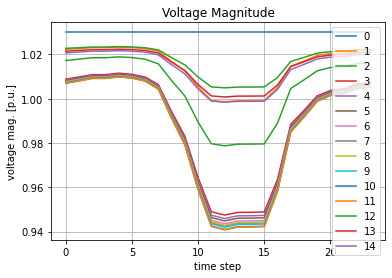

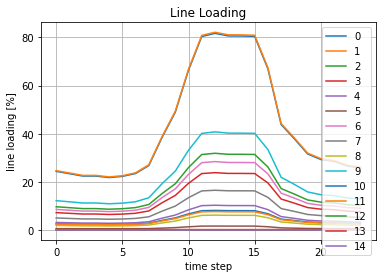

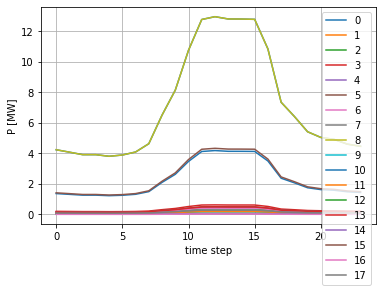

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline  

# voltage results
vm_pu_file = os.path.join(output_dir, "res_bus", "vm_pu.xlsx")
vm_pu = pd.read_excel(vm_pu_file, index_col=0)
vm_pu.plot(label="vm_pu")
plt.xlabel("time step")
plt.ylabel("voltage mag. [p.u.]")
plt.title("Voltage Magnitude")
plt.grid()
plt.show()

# line loading results
ll_file = os.path.join(output_dir, "res_line", "loading_percent.xlsx")
line_loading = pd.read_excel(ll_file, index_col=0)
line_loading.plot(label="line_loading")
plt.xlabel("time step")
plt.ylabel("line loading [%]")
plt.title("Line Loading")
plt.grid()
plt.show()

# load results
load_file = os.path.join(output_dir, "res_load", "p_mw.xlsx")
load = pd.read_excel(load_file, index_col=0)
load.plot(label="load")
plt.xlabel("time step")
plt.ylabel("P [MW]")
plt.grid()
plt.show()